# Problemas de Difusión

## Conduccion de calor 2D

La ecuacion de conduccion de calor en 2D es:

$$
\begin{equation}
\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial x} \left( \kappa_x \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left(\kappa_y \frac{\partial T}{\partial y} \right)
\end{equation}
$$

donde $\rho$ es la densidad, $c_p$ es la capacidad calorifica y $\kappa$ es la conductividad termica.

Si la conductividad termica $\kappa$ es constante, la ecuacion se simplifica a:

$$
\begin{equation}
\frac{\partial T}{\partial t} = \alpha \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right)
\end{equation}
$$

donde $\alpha = \frac{\kappa}{\rho c_p}$ es la difusividad termica.  La misma describe la habilidad del material para conducir calor con respecto a su capacidad de almacenarlo.
Notamos que esta ecuacion luce familiar ... en efecto, es una ecuacion de *difusion*!

### Configuracion del Problema

Deseamos estudiar el proceso de disipacion de calor en un chip por medio de un modelo simplificado. Para ello consideremos al chip como una placa 2D de tamaño $1{\rm cm}\times 1{\rm cm}$, fabricada en silicio: $\kappa = 159{\rm W/m C}$, $c_p = 0.712\cdot 10^3 {\rm J/kg C}$, $\rho = 2329{\rm kg/m}^3$, y difusividad $\alpha \approx 10^{-4}{\rm m}^2{/\rm s}$. El silicio funde a $1414^{\circ}{\rm C}$, sin embargo el chip deberia operar a temperaturas mucho mas bajas. La temperatura maxima permitida depende del procesador; en muchos casos, se encuentra entre $60^{\circ}{\rm C}$ y $\sim70^{\circ}{\rm C}$, pero en modernas CPUs se recomienda su operacion a un maximo de [$80^{\circ}{\rm C}$](http://www.pugetsystems.com/blog/2009/02/26/intel-core-i7-temperatures/) (por ejemplo el Intel Core i7).

Consideremos que el chip se encuentra en una posicion para la cual sus bordes superior y derecho estan en contacto con un material aislante. Mientras que en los otros dos bordes el chip toca unos componentes los cuales permanecen a una temperatura constante de $T=100^{\circ}{\rm C}$ cuando la maquina se encuentra en operacion. Inicialmente, el chip esta a temperatura ambiente $(20^{\circ}{\rm C})$. *Cuanto tiempo le lleva al centro del chip en alcanzar $70^{\circ}{\rm C}$?*

<img src='./figuras/2dchip.svg' width='400px'>

## Diferencias Finitas 2D

Emplearemos una grilla Cartesiana 2D. Dos lineas se intersectan en un unico nodo de la grilla (en este caso se trata de una grilla *estructurada*). En la direccion $x$, la discretizacion emplea $i=0, \cdots N_x$ lineas, mientras que en la direccion $y$ tenemos $j=0, \cdots N_y$ lineas. Un nodo dado en la grilla tendra ahora dos coordenadas espaciales: por ejemplo, el punto medio en la siguiente figura seria $T_{i,j}$.

<img src="./figuras/2dgrid.svg">

#### Coordenadas nodales en 2 dimensiones

### Esquema Explicito en 2D

Recordemos la ecuacion de calor 2D:

$$
\frac{\partial T}{\partial t} = \alpha \left(\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right)
$$

Escribamos esta ecuacion discretizada empleando un esquema explicito en diferencias hacia adelante en tiempo y centrado en espacio:

$$
\begin{equation}
\frac{T^{n+1}_{i,j} - T^n_{i,j}}{\Delta t} = \alpha \left( \frac{T^n_{i+1, j} - 2T^n_{i,j} + T^n_{i-1,j}}{\Delta x^2} + \frac{T^n_{i, j+1} - 2T^n_{i,j} + T^n_{i,j-1}}{\Delta y^2}\right)
\end{equation}
$$

Rearreglando la ecuacion a fin de obtener el valor en el proximo paso de tiempo, $T^{n+1}_{i,j}$, resulta

$$
\begin{equation}
T^{n+1}_{i,j}= T^n_{i,j} + \alpha \left( \frac{\Delta t}{\Delta x^2} (T^n_{i+1, j} - 2T^n_{i,j} + T^n_{i-1,j}) + \\\frac{\Delta t}{\Delta y^2} (T^n_{i, j+1} - 2T^n_{i,j} + T^n_{i,j-1})\right)
\end{equation}
$$

A continuacion ilustramos el stencil 2D que nos permite avanzar la solucion del esquema un paso de tiempo: empleamos 5 puntos de grilla en el paso de tiempo $n$ para obtener la solucion correspondiente a un punto en el paso de tiempo $n+1$.

<img src="./figuras/2d_stencil.svg">

#### Stencil Explicito 2D

### Condiciones Frontera

Recordemos que la condicion de borde tipo Neumann prescribe la derivada en direccion normal. Por ejemplo, en el problema descripto anteriormente, tenemos $\frac{\partial T}{\partial y} = q_y$ en el borde superior y $\frac{\partial T}{\partial x} = q_x$ en el borde derecho, con $q_y = q_x = 0$ (aislante).

De esta forma, en cada paso de tiempo, imponemos:

$$
\begin{equation}
T_{i,end} = q_y\cdot\Delta y + T_{i,end-1}
\end{equation}
$$
y
$$
\begin{equation}
T_{end,j} = q_x\cdot\Delta x + T_{end-1,j}
\end{equation}
$$

### Estabilidad

Hemos visto en el cuaderno 1 del presente modulo que la discretizacion explicita 1D de la ecuacion de difusion es estable mientras se satisfaga $\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}$. En 2D, esta restriccion es aun mas estricta, puesto que necesitamos considerarla en ambas direcciones:

$$
\begin{equation}
\alpha \frac{\Delta t}{(\Delta x)^2} + \alpha \frac{\Delta t}{(\Delta y)^2} < \frac{1}{2}.
\end{equation}
$$

Si el espacio entre los nodos de la grilla es el mismo en ambas direcciones $x$ e $y$, $\Delta x = \Delta y = \delta$. En este caso, la condicion de estabilidad es:

$$
\begin{equation}
\alpha \frac{\Delta t}{\delta^2} < \frac{1}{4}
\end{equation}
$$

## Implementacion de Codigo

### Almacenamiento matricial

Almacenamos los valores de temperatura en 2 dimensiones: una matriz 2D. Consideramos la coordenada $y$ correspondiente a las filas de la matriz y la coordenada $x$ que varia con las columnas. Conservando la consistencia con la formula del *stencil*, el valor de $T_{i,j}$ sera almacenado en formato matricial como `T[j,i]`.
Como se ilustra en la siguiente figura, si queremos tener acceso al valor $18$ escribiremos las coordenadas como $(x_2, y_3)$. Podemos ver que la posicion corresponde a la fila 3, columna 2, por lo que su direccion matricial seria `T[3,2]`.

<img src="./figuras/rowcolumn.svg" width="400px">

### A codificar!

En primer lugar, procuraremos una funcion para avanzar la solucion en tiempo con un esquema tipo *forward-time, centered-space*. Esta funcion permitira controlar el centro de la placa para avisarnos cuando la misma alcanza una temperatura de $70^{\circ}{\rm C}$. Comencemos configurando nuestro entorno Python.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    """
    Computes and returns the temperature distribution
    after a given number of time steps.
    Explicit integration using forward differencing
    in time and central differencing in space, with
    Neumann conditions (zero-gradient) on top and right
    boundaries and Dirichlet conditions on bottom and
    left boundaries.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 2D array of floats.
    nt : integer
        Maximum number of time steps to compute.
    dt : float
        Time-step size.
    dx : float
        Grid spacing in the x direction.
    dy : float
        Grid spacing in the y direction.
    alpha : float
        Thermal diffusivity.
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 2D array of floats.
    """
    # Define some constants.
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    # Integrate in time.
    T = T0.copy()
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny / 2)  # indices of the center
    for n in range(nt):
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
        # Apply Neumann conditions (zero-gradient).
        T[-1, :] = T[-2, :]
        T[:, -1] = T[:, -2]
        # Check if the center of the domain has reached T = 70C.
        if T[J, I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T

La sentencia [`break`](https://docs.python.org/3/tutorial/controlflow.html) permite salir del bucle `for` a la iteracion temporal para la cual el centro de la placa alcanza $70^{\circ}{\rm C}$. En la siguiente celda de codigo, definimos nuestra condicion inicial y elegimos los parametros de discretizacion.

In [5]:
# Set parameters.
Lx = 0.01  # length of the plate in the x direction
Ly = 0.01  # height of the plate in the y direction
nx = 21  # number of points in the x direction
ny = 21  # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
alpha = 1e-4  # thermal diffusivity of the plate

# Define the locations along a gridline.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Compute the initial temperature distribution.
Tb = 100.0  # temperature at the left and bottom boundaries
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = Tb
T0[:, 0] = Tb

A fin de evitar la explosion de la solucion, fijemos el paso de tiempo en $\frac{\alpha \Delta t}{\Delta x^2} = \frac{\alpha \Delta t}{\Delta y^2} = \frac{1}{4}$. 

In [6]:
# Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
nt = 500  # number of time steps to compute

# Compute the temperature along the rod.
T = ftcs(T0, nt, dt, dx, dy, alpha)

[time step 256] Center at T=70.02 at t=0.16 s


### Visualizar resultados

Al considerar ahora 2 dimensiones espaciales y otro valor (temperatura en nuestro caso) a representar, podemos hacer uso de un mapa de curvas de nivel! Para esto revisemos la documentacion en [`pyplot.contourf`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contour) (la 'f' denota *filled contours*).


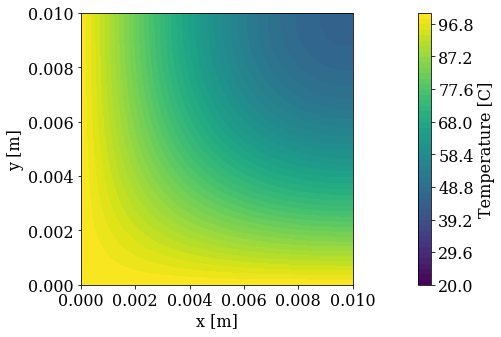

In [8]:
# Plot the filled contour of the temperature.
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled', adjustable='box');

<div class="alert alert-block alert-warning">
That looks pretty cool! Note that in the call to `pyplot.contourf` you can specify the number of contour levels to display (we chose `51`).  Look at that visualization: does it make physical sense to you, considering that the upper and right sides of the chip are insulated, in our problem?
</div>

##### Dig deeper

<div class="alert alert-block alert-success">
In the problem we just demonstrated, the chip reaches a temperature of $70^{\circ}{\rm C}$ at a given time, but will it keep increasing? That spells trouble.

Imagine that you have a heat sink instead of an insulator acting on the upper and right sides. What should be the heat flux that the heat sink achieves there, so that the temperature does not exceed $70^{\circ}{\rm C}$ at the center of the chip?
</div>    

---
###### The cell below loads the style of the notebook

In [9]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())